In [1]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math
import seaborn as sns
import imageio

from pathlib import Path 

from sklearn.metrics import mean_squared_error, mean_absolute_error

In [2]:
 
def get_the_filenames(file_name_main, timestep, filepath):
    file = f'{file_name_main}timestep_{timestep}_future'
    filename = f'{filepath}/{file}.csv'

    return filename

In [3]:
def calculate_rmse(df):
    rmse_seq = []
    for i in range (1, len(df)+1):
        rmse = mean_squared_error(df['temperature_air_mean_200'].iloc[:i], df['prediction'].iloc[:i])
        rmse_seq.append(rmse)

    return rmse_seq


In [4]:
def plot_daily_rmse(folder, file_name_main):
    filepath = Path(f'/Users/gulcinvardar/Desktop/Data_Science_Bootcamp/stationary-sriracha-student-code/projects/week_final/csvs/{folder}')
    filenames = []
    timesteps = [1, 3, 5, 7, 15, 30]
    for timestep in timesteps:
        filename = get_the_filenames(file_name_main, timestep, filepath)
        filenames.append(filename)
    rmse_all = []
    for filename in filenames:
        df = pd.read_csv(filename)
        rmse_seq = calculate_rmse(df)
        rmse_all.append(rmse_seq)
    for rmse in rmse_all:
        plt.plot(rmse)
    plt.legend(('Timestep: 1', 'Timestep: 3', 'Timestep: 5', 'Timestep: 7', 'Timestep: 15', 'Timestep: 30' ))
    plt.xlabel('Number of days')
    plt.ylabel('RMSE')
    plt.ylim(0,50)
   
        
        

In [5]:
folder = 'multivariate/actually_fourty_years_time'
file_name_main = 'S_multi_years_twenty_time_LSTM_'

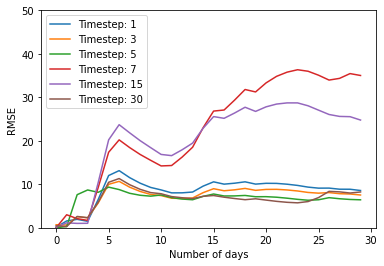

In [6]:
fig_multi = plot_daily_rmse(folder, file_name_main)

In [7]:
folder_ten = 'multivariate/actually_ten_years_time'
file_name_main_ten = 'S_multi_years_twenty_time_LSTM_'

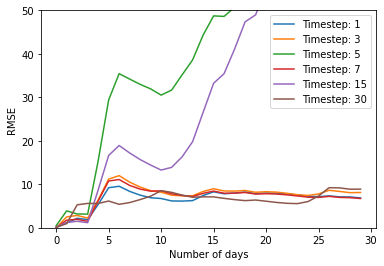

In [8]:
fig_ten = plot_daily_rmse(folder_ten, file_name_main_ten)

In [9]:
folder_more_features = 'multivariate/multivariate_more_features'
file_name_more_features = 'S_multi_years_forty_more_features_time_LSTM_'

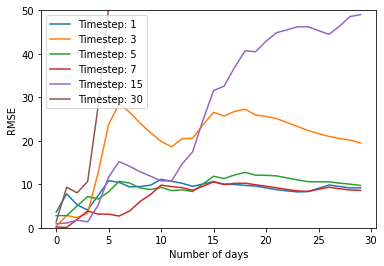

In [10]:
fig_twenty = plot_daily_rmse(folder_more_features, file_name_more_features)

In [29]:
folder_features = 'multivariate/multivariate_more_features'
file_name_features = 'S_multi_years_forty_more_features_time_LSTM_'

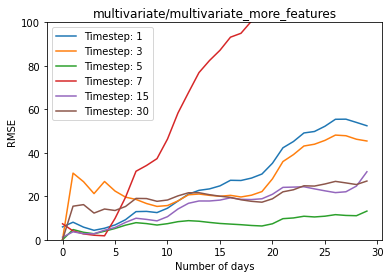

In [30]:
fig_features = plot_daily_rmse(folder_features, file_name_features)

In [11]:
folder_twenty = 'multivariate/twenty_years_time'
file_name_twenty = 'S_multi_years_twenty_time_LSTM_'

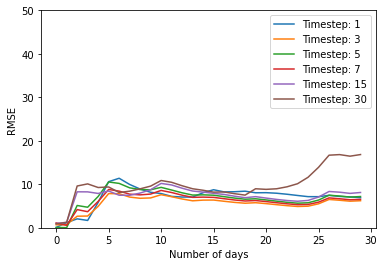

In [12]:
fig_cnn = plot_daily_rmse(folder_twenty, file_name_twenty)

In [19]:
folder_cnn = 'multivariate/with_cnn'
file_cnn = 'CNN_LSTM_fourty_'

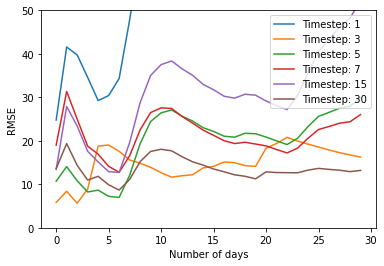

In [20]:
fig_cnn = plot_daily_rmse(folder_cnn, file_cnn)

----

In [23]:
folder = 'timestep_5'
file_names = ['S_univariate_forty_LSTM_timestep_5_future.csv',
            'S_multi_years_ten_time_LSTM_timestep_5_future.csv',
            'S_multi_years_twenty_time_LSTM_timestep_5_future.csv',
            'S_multi_years_fourty_time_LSTM_timestep_5_future.csv',
            'S_multi_years_forty_more_features_time_LSTM_timestep_5_future.csv',
            'CNN_LSTM_fourty_timestep_5_future.csv',
            'predict_prophet_complex.csv']

(0.0, 50.0)

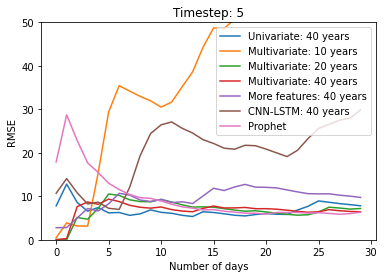

In [24]:
rmse_all = []
for file_name in file_names:
    filepath = Path(f'/Users/gulcinvardar/Desktop/Data_Science_Bootcamp/stationary-sriracha-student-code/projects/week_final/csvs/timestep_5')
    file = f'{filepath}/{file_name}'
    df = pd.read_csv(file)
    rmse_seq = calculate_rmse(df)
    rmse_all.append(rmse_seq)
for rmse in rmse_all:
    plt.plot(rmse)
plt.legend(('Univariate: 40 years', 'Multivariate: 10 years', 'Multivariate: 20 years', 'Multivariate: 40 years', 'More features: 40 years', 'CNN-LSTM: 40 years', 'Prophet' ))
plt.xlabel('Number of days')
plt.ylabel('RMSE')
plt.title('Timestep: 5')
plt.ylim(0,50)